In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import json

maxInt = sys.maxsize
filename = 'reportData.csv'

while True:
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

f = open(filename,'r')
reader = csv.reader(f)

models = []
methods = []
calls = []
values = []

for row in reader:
    index = reader.line_num        
    models.append(row[0])
    methods.append(row[1])
    values.append(json.loads(row[2]))
    calls.append(json.loads(row[3]))
f.close()

def getData(name,models,values,calls,methods):
    xdata = []
    ydata = []
    legends = []
    for i in range(len(models)):
        if models[i] == name:
            xdata.append(values[i])
            ydata.append(calls[i])
            legends.append(methods[i])
    return xdata,ydata,legends

def drawPlots(models_selected,logdisplay=True):
    xdata00,ydata00,legends00 = getData(models_selected[0],models,values,calls,methods)
    xdata01,ydata01,legends01 = getData(models_selected[1],models,values,calls,methods)
    xdata10,ydata10,legends10 = getData(models_selected[2],models,values,calls,methods)
    xdata11,ydata11,legends11 = getData(models_selected[3],models,values,calls,methods)

    # index = 0
    # for x,y in zip(xdata10,ydata10):
    #     print(index)
    #     index += 1
    #     plt.plot(y,x,'-.')
    #     if(index>3):
    #         break
    # plt.yscale('log')
    # plt.xscale('log')
    # plt.legend(legends10)
    # plt.show()
    # return

    # fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
    fig, ax = plt.subplots(2, 2)

    ax[1,0] = plt.subplot(223)
    for i,j in zip(xdata10,ydata10):
        plt.plot(j,i,'-.')
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[2])

    # ax[0,0] = plt.subplot(221,sharex=ax[1,0])
    ax[0,0] = plt.subplot(221)
    for i,j in zip(xdata00,ydata00):
        plt.plot(j,i,'-.')
    
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[0])
    # plt.setp(ax[0,0].get_xticklabels(), visible=False)

    # ax[1,1] = plt.subplot(224,sharey=ax[1,0])
    ax[1,1] = plt.subplot(224)
    for i,j in zip(xdata11,ydata11):
        plt.plot(j,i,'-.')
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[3])
    # plt.setp(ax[1,1].get_yticklabels(), visible=False)

    # ax[0,1] = plt.subplot(222,sharex=ax[1,0],sharey=ax[0,0])
    ax[0,1] = plt.subplot(222)
    for i,j in zip(xdata01,ydata01):
        plt.plot(j,i,'-.')
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[1])
    # plt.setp(ax[0,1].get_yticklabels(), visible=False)
    # plt.setp(ax[0,1].get_xticklabels(), visible=False)

    line_labels = ['halton','vander','hammersley','sobol','latin']
    fig.legend(labels=line_labels,
               loc='center left', 
               bbox_to_anchor=(0.99, 0.5),
               title="Sampling method",  # Title for the legend
    )

    # Adjust the scaling factor to fit your legend text completely outside the plot
    # (smaller value results in more space being made for the legend)
    # plt.subplots_adjust(right=0.85)
    plt.tight_layout()
    plt.savefig('test.eps',bbox_inches = 'tight')

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


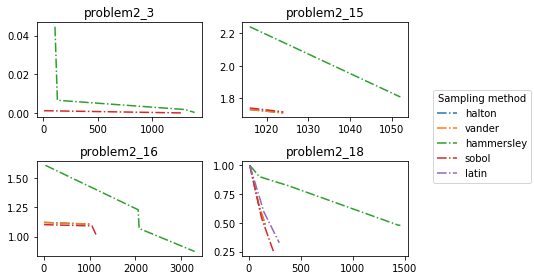

In [6]:
selected_smooth_nonconvex = ['3pk','brownden','biggs3','branin']
selected_nonsmooth_convex = ['problem2_1','problem2_6','problem2_11','problem2_19']
selected_smooth_convex = ['fconvex3_10_1','fconvex3_20_1','fconvex3_100_1','fconvex3_300_1']
selected_nonsmooth_nonconvex = ['problem2_3','problem2_15','problem2_16','problem2_18']

drawPlots(selected_nonsmooth_nonconvex,logdisplay=False)

In [44]:
import json
import csv
import sys
def writeInput(filename,values):
    infile = open(filename, 'w')
    for val in values:
        infile.write(str(val)+'\n')
    infile.close()

def readOutput(filename):
    readfile = open(filename, 'r')
    line = readfile.readline()
    if(line.strip() == "1.#INF00000000000"):
        return "INF"
    else:
        output_value = float(line.strip())
        return output_value

def readSolution(name):
    # read solution point from .sol files
    solFile = open(name+'.sol','r')
    # coordinate solution
    solCoordinate = []
    for row in solFile:
        lst = row.split()
        for i in lst:
            solCoordinate.append(float(i))
    writeInput('input.in',solCoordinate)
    # optimal value solution
    solValue = readOutput('output.out')
    
    # read data from report csv file
    maxInt = sys.maxsize
    while True:
        try:
            csv.field_size_limit(maxInt)
            break
        except OverflowError:
            maxInt = int(maxInt/10)
        
    dataFile = open('reportData.csv','r')
    reader = csv.reader(dataFile)
    pointDic = {}
    valueDic = {}
    for row in reader:
        if row[0] == name:
            method = row[1]
            pointDic[method] =  json.loads(row[4])[-1]
            valueDic[method] = json.loads(row[2])[-1]
    
    solFile.close()
    dataFile.close()
    pointDic['solution'] = solCoordinate
    valueDic['solution'] = solValue
    return valueDic,pointDic
values, points = readSolution('3pk')

{'halton': 71.78810064647452,
 'vander': 71.78810064647452,
 'hammersley': 67.56956696566328,
 'sobol': 144.4720265866033,
 'latin': 152.8530982079288,
 'solution': 'INF'}